# **EAI 6010 Applications of Artifical Intelligence**

## **Week 2 - Machine Learning with scikit learn**

Welcome to this week's class where you will immerse yourself in machine learning with Python. Using both `pandas` and `scikit learn`, we'll learn how to investigate and process data for machine learning and generate predictions on a telecom churn case study. In this session you will learn:

- The different types of machine learning and when to use them.
- How to apply data preprocessing for machine learning including feature engineering. 
- How to apply supervised machine learning models to generate predictions!


## **The Dataset**

The data set that we will use is called telco.csv and it is a data from the Telecommuncations industry. We shall first import the various packages that we will need to work on our problem. You will notice below that we have also imported the code snippet `from IPython.core.interactiveshell...` which will allow us to output multiple outputs from code in the same cell. Typically if you have multiple commands in the same cell, then the default in Jupyter is that it will display output only from the last line of code. 
As we go through the data exploration phase, we will observe the data idiosyncracies and note down these oservations

The dataset to be used in this session is a CSV file named `telco.csv`, which contains data on telecom customers churning and some of their key behaviors. It contains the following columns:

**Features**:

- `customerID`: Unique identifier of a customer.
- `gender`: Gender of customer.
- `SeniorCitizen`: Binary variable indicating if customer is senior citizen.
- `Partner`: Binary variable if customer has a partner.
- `Dependents`: Binary variable if customer has dependent.
- `tenure`: Number of weeks as a customer.
- `PhoneService`: Whether customer has phone service.
- `MultipleLines`: Whether customer has multiple lines.
- `InternetService`: What type of internet service customer has (`"DSL"`, `"Fiber optic"`, `"No"`).
- `OnlineSecurity`: Whether customer has online security service.
- `OnlineBackup`: Whether customer has online backup service.
- `DeviceProtection`: Whether customer has device protection service.
- `TechSupport`: Whether customer has tech support service.
- `StreamingTV`: Whether customer has TV streaming service.
- `StreamingMovies`: Whether customer has movies streaming service.
- `Contract`: Customer Contract Type (`'Month-to-month'`, `'One year'`, `'Two year'`).
- `PaperlessBilling`: Whether paperless billing is enabled.
- `PaymentMethod`: Payment method.
- `MonthlyCharges`: Amount of monthly charges in $.
- `TotalCharges`: Amount of total charges so far.

**Target Variable**:

- `Churn`: Whether customer `'Stayed'` or `'Churned'`.


In [1]:
# Import pandas
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## **Data Exploration**

In [2]:
# Read in dataset
telco = pd.read_csv('telco.csv', index_col = "Unnamed: 0")
pd.set_option('display.max_columns', None)

In [3]:
# Print header
telco.head()
#Dimensions of the data and investigate if there are any duplicate rows
telco.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


(7043, 21)

- **Observation 1:** For the purposes of machine learning, the `customerID` does not have any predictive power and will be dropped.
- **Observation 2:** Categorical variables need to be encoded as numeric for machine learning.

In [4]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation 3:** `TotalCharges` column is of type `object` - it needs to be converted to `float`.

In [5]:
# Take a look at unique values in telco
telco.nunique()
# Finding the null values for each column
print(telco.isnull().sum())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        4
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Observation 4:** The `InternetService` column should have `'DSL'`, `'Fiber optic'` and `'No'` as values - yet here there are 4 unique values. 

In [6]:
# Unique values of internet service
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No', 'dsl'], dtype=object)

In [7]:
#Calculate summary statistics
summary = telco.describe(include=['object'])
summary = summary.transpose()
summary.head()
print(telco.describe(include='all'))

,count,unique,top,freq
customerID,7043,7043,6242-SGYTS,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933


        customerID gender SeniorCitizen Partner Dependents       tenure  \
count         7043   7043          7043    7043       7043  7043.000000   
unique        7043      2             2       2          2          NaN   
top     6242-SGYTS   Male            No      No         No          NaN   
freq             1   3555          5901    3641       4933          NaN   
mean           NaN    NaN           NaN     NaN        NaN    32.371149   
std            NaN    NaN           NaN     NaN        NaN    24.559481   
min            NaN    NaN           NaN     NaN        NaN     0.000000   
25%            NaN    NaN           NaN     NaN        NaN     9.000000   
50%            NaN    NaN           NaN     NaN        NaN    29.000000   
75%            NaN    NaN           NaN     NaN        NaN    55.000000   
max            NaN    NaN           NaN     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
count          704

**Observation 4:** The `InternetService` column has a `'dsl'` value that needs to be collapsed to `'DSL'`.

The **null model** is a model of reference to use for classification accuracy - where the  **null accuracy** is the accuracy of the model if we always choose the most frequent class *(or outcome)*. Accuracy is determined here by the following:

<br>


$$\large{accuracy = \frac{\# \space times \space model \space is \space right}{total \space number \space of \space predictions}}$$



In [8]:
#Frequency distribution of some key variables
telco['Churn'].value_counts()
telco['InternetService'].value_counts()
telco['TotalCharges'].value_counts()
telco['TotalCharges'].isnull().sum()

Stayed     5174
Churned    1869
Name: Churn, dtype: int64

Fiber optic    3096
DSL            2391
No             1526
dsl              30
Name: InternetService, dtype: int64

20.2      11
          11
19.75      9
19.9       8
19.65      8
          ..
5860.7     1
81         1
7556.9     1
563.05     1
4689.5     1
Name: TotalCharges, Length: 6531, dtype: int64

0

## **Use pandas_profiling for small datasets**
`conda install -c conda-forge pandas-profiling` -- use this code snippet on your command line to install pandas-profiling which provides a comprehensive report on the variables and various statistics around it.
It can be fairly overwhelming but is useful with smaller datasets - say a few thousand observations and 75+ variables
`pandas_profiling.ProfileReport(telco)`
I do not use it here and not recommended for large datasets

<AxesSubplot:>

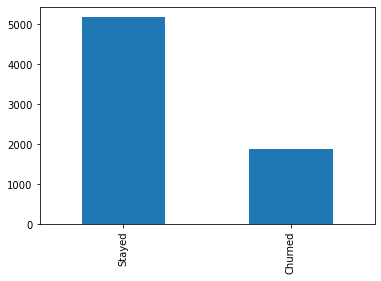

In [9]:
# Find the null model
telco['Churn'].value_counts().plot(kind='bar')

$$\large{null \space accuracy = \frac{\# \space times \space model \space predicted \space "Stayed"}{total \space number \space of \space predictions}}$$

In [10]:
# Find the null model
telco['Churn'].value_counts() / telco.shape[0]

Stayed     0.73463
Churned    0.26537
Name: Churn, dtype: float64

In this particular instance, the null model (always predicting `"Stayed"`) is 73.4% - and any meaningful model that improves performance will have to break that accuracy score. 

---
<center><h1>Data Cleaning</h1> </center>

---

## **Data Cleaning**

**Task 1: Dropping** `customerID` **column**

To drop a column from a DataFrame - we can use the `.drop()` method alongside the following arguments:

- Name of `column` dropped - in this example `'customerID'`
- `axis`: Whether to drop row (`0`), or column (`1`).
- `inplace`: Boolean whether to drop in place and overwrite change in DataFrame.

In [11]:
# Drop customer ID column
telco.drop('customerID', axis = 1, inplace = True)

**Task 2: Converting** `TotalCharges` **column**

To convert a column from string to numeric - we can use the `pd.to_numeric()` function - which takes the following arguments:

- Name of `column` to convert - in this example `'TotalCharges'`
- `errors`: Whether to `'raise'` an error if it cannot be converted or to `'coerce'` it to `NaN`.

In [12]:
# Convert TotalCharges to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [13]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# Print # of missing values
telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Observation 5:** The `TotalCharges` column has 11 missing values here - we can either drop them or impute the missing values with a statistical measure _(e.g. median or mean)_.

## **Handling missing values - dropping them or replacing them**
To remove all rows with NaNs in column `x` use `dropna`:
`telco = telco.dropna(subset=['TotalCharges'])`
`telco['TotalCharges'].fillna(mode(telco['TotalCharges']).mode[0], inplace=True)`  
We do not do it here but substitute missing values with their mean.
Alternatively you can also replace missing values with their median
`telco.loc[telco['TotalCharges'].isna(), 'TotalCharges'] = telco['TotalCharges'].median()`

In [15]:
telco['TotalCharges'].fillna((telco['TotalCharges'].mean()), inplace=True) 
telco.shape

(7043, 20)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

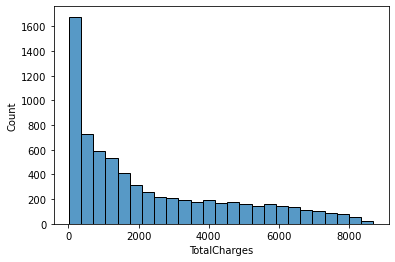

In [16]:
# Visualize distribution of TotalCharges
sns.histplot(telco['TotalCharges'])

In [17]:
# Get distribution of TotalCharges
telco['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

As a reminder, the `.loc[]` method lets us slice a DataFrame by a group of rows or columns by labels or boolean arrays - meaning we can subset a DataFrame `df` as such:

```
df.loc[row condition, column label]
```

In [18]:
# Make sure that there are no more missing values
telco['TotalCharges'].isna().sum()

0

**Task 3: Collapse** values of `InternetService` **column**

To replace the values in of a column `col_A` in a DataFrame `df` - we can use the `.replace()` method which takes in a dictionary mapping the `old_value` to the `new_value` as such:

```
df['col_A'] = df['col_A'].replace({old_value : new_value})
```


In [19]:
# Collapse 'dsl' into 'DSL'
telco['InternetService'] = telco['InternetService'].replace({'dsl':"DSL"})
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

---
<center><h1> Q&A 2</h1> </center>

---

## **Exploratory Analysis for Machine Learning**

In order to understand which models have predictive power, which variables to use in feature engineering, and to build a common sense understanding of what is driving churn to understand results, it essential to explore the data and observe how **features** interact with the **target** variable. 

There are broadly 3 types of data: 

- Continous _(e.g. age)_ data. 
- Categorical data _(e.g. marriage status)_. 
- Other *(e.g. image, tweets, etc...)*

Let's visualize how continous and categorical data in `telco` behave with `Churn`.

In [20]:
# Take a look at the header
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


> *A note on list comprehensions:*
>
> List comprehensions provide an elegant way to iteratively produce lists without using a traditional `for` loop. For example, here's how we can create a list of numbers from 0 to 9:
>
> ```
> my_list = [i for i in range(0,10)]
>
> print(my_list)
>
> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```
>
> It is also possible to add an `if` statement to create a condition while creating the list - here is an example where we create a list of numbers bigger than 3 from values ranging 0 to 9:
>
>```
># Create a list of the doubles of values from 0 to 9
>my_list = [i for i in range(0,10) if i > 3]
>
>print(my_list)
>
>[4, 5, 6, 7, 8, 9]
```

In [21]:
# Get dtypes of column
telco.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
# Get all features
features = [column_name for column_name in telco.columns if column_name != 'Churn']

# Get all categorical features
categorical = [column_name for column_name in features if telco[column_name].dtype == 'object']

# Get all numeric columns
numeric = [column_name for column_name in features if column_name not in categorical]

In [23]:
#Print out the features
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [24]:
# Print out the catergorical features 
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [25]:
# Print out the numeric features them out and make sure
numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

### **Data Visualization Refresher** 
> 
> A `matplotlib` visualization is made of 3 components:
> - A **figure** which houses in one or many subplots (or axes).
> - The **axes** objects ~ the subplots within the figure.
> - The plot inside each subplot or axes.
>
> We can generate a figure with subplots using the following function:
>
> `fig, axes = plt.subplots(nrow, ncol)`
> 

#### *Visualizing target variable relationship with categorical features*

To visualize the count of different categorical values by `Churn`, we can use the `sns.countplot(x, hue, data, ax)` function which takes in:
- `x`: The column name being counted.
- `hue`: The column name used for grouping the data.
- `data`: The DataFrame being visualized.
- `ax`: Which axes in the figure to assign the plot.

# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5) 

# Create figure and axes
fig, axes = plt.subplots(5, 3, figsize = (100, 100))

# Iterate over each axes, and plot a countplot with categorical columns
for ax, column in zip(axes.flatten(), categorical):
    
    # Create countplot
    sns.countplot(x = column, hue =  'Churn', data = telco, ax = ax)
    
    # Set the title of each subplott
    ax.set_title(column)

    # Improve legends
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right', fontsize = 48)
    ax.get_legend().remove()

**Observation 6:** Gender seems to have a 50-50 split and values and does not affect Churn.

**Observation 7:** `Fiber optic` Internet Service seems to be a driver of Churn.

**Observation 8:** `OnlineBackup`, `DeviceProtection`, `TechSupport` and `OnlineSecurity` users tend to churn less.

#### **Visualizing target variable relationship with continuous features**

A great way to observe the differences between two groups (or categories) of data according to a numeric value is a boxplot, which visualizes the following:


It can be visusalized as such:

- `sns.boxplot(x=, y=, data=)`
  - `x`: Categorical variable we want to group our data by.
  - `y`: Numeric variable being observed by group.
  - `data`: The DataFrame being used.
  

# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 
 
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize = (20, 8))

# Iterate over each axes, and plot a boxplot with numeric columns
for ax, column in zip(axes.flatten(), numeric):
    
    # Create a boxplot
    sns.boxplot(x = "Churn", y = column, data = telco, ax = ax)
    
    # Set title
    ax.set_title(column)

**Observation 8:** Higher monthly charges tend to be related to Churn.

**Observation 9:** Tenure may seem predictive, but it could very well much be that churners have low tenure by nature because they are churning.

---
<center><h1> Data Pre-Processing </h1> </center>

---

## **Data pre-processing for machine learning**

Many machine learning algorithms require data to be processed before being passed into an algorithm first - dependent on whether data is numeric or categorical, the processing strategy is different.

**Continuous or numeric data**

Many machine learning models make assumptions about the distribution of numeric features when modeling (most commonly data is assumed to be normally distributed). Also, many numeric columns have different scales _(e.g. Age vs Salary)_. 

A common way to process numeric columns is through **Standardization** - where we substract their mean and divide by their standard deviation so that their mean becomes centered around 0 and have a standard deviation of 1 :

$$\large{x_{scaled} = \frac{x - mean}{std}}$$

<br>


<br>

We can do this easily in `sklearn` by using the `StandardScaler()` function. Many operations in `sklearn` fit the following `.fit()` $\rightarrow$ `.transform()` paradigm and `StandardScaler()` is no different:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on data
scaler.fit(df[my_column])

# Transformed
column_scaled = scaler.transform(df[my_column])

# Replace column
df[my_column] = column_scaled
```

However, it is very important to **first split** your data before scaling your features since we do not want to scale our data according to the distribution of both the training data and test data. Failing to do so results in **data leakage** and could lead to "too good to be true" results on testing data with relatively weaker results on unseen data. 

<font color=00AAFF>Ideally, scalers should be fit on **training data only** - and be used to transform both training and testing data.</font>

In [26]:
# Split data between X and label
X = telco[features]
y = telco['Churn'].replace({'Stayed': 0, 'Churned':1})

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.25, random_state=123)

In [28]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intialize a scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(train_X[numeric])

# Transform training and test data
train_numeric_transform = scaler.transform(train_X[numeric])
test_numeric_transform = scaler.transform(test_X[numeric])

StandardScaler()

In [29]:
# Replace columns in training and testing data accordingly
train_X[numeric] = train_numeric_transform
test_X[numeric] = test_numeric_transform

**Categorical data**

While categorical variables like country, marriage status and more are easily interpretable by humans - they need to be properly encoded to be understood by machine learning algorithms. We will be using dummy encoding *(highly similar to one-hot encoding)* where categorical variables are converted to binary (`1`,`0`) columns to indicate whether they have a certain value or not. Note that, dummy encoding generates `n-1` categories. Using a country example - `0` on all columns encodes it as France.

<br>


Using dummy encoding in `pandas` is actually very easy - we can use the `pd.get_dummies()` function which takes:

- The DataFrame being converted.
- `columns`: The name of the categorical columns to be converted.
- `drop_first`: Boolean to indicate onehot encoding (`False`) or dummy encoding (`True`).




In [30]:
# Use One hot encoding to code categorical variables
train_X = pd.get_dummies(train_X, columns = categorical,  drop_first = True)
test_X = pd.get_dummies(test_X, columns = categorical,  drop_first = True)

**Feature Engineering**

Generating new predictive features from existing features is an important aspect of machine learning. New features could be engineered using:

- Binning numeric values _(e.g. `age_category` column from `age` column)._
- Interaction of 2 columns _(e.g. `total_salary`/`tenure`)._
- Features from domain knowledge.

We learned while visualizing categorical columns that being subscribed to `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport` tend to drive less churn. Let's visualize this further with a new feature called `in_ecosystem` which counts the number of services a given customer is subscribed to.


In [31]:
# Re-add Churned to add to train and test
train_X['Churn'] = train_Y
test_X['Churn'] = test_Y

In [32]:
# Check out header again
train_X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
6464,0.707712,0.185175,0.513153,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5707,-1.248999,-0.641538,-0.980261,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3442,-0.148349,1.133562,0.226231,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3932,-1.248999,0.458524,-0.951391,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
6124,0.993065,-0.183179,0.433280,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0


0    2098
1    1096
2    1034
3     707
4     347
Name: in_ecosystem, dtype: int64

C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='in_ecosystem'>

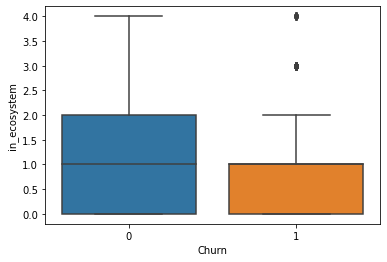

In [33]:
# Service columns
service_columns = ['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes']

# Create in_ecosystem column
train_X['in_ecosystem'] = train_X[service_columns].sum(axis = 1)
train_X['in_ecosystem'].value_counts()
# Visualize churn by number of services subscribed
sns.boxplot('Churn', 'in_ecosystem', data = train_X)

In [34]:
# Create feature that is 1 if 2 or more services subscribed, 0 otherwise
train_X['in_ecosystem'] = np.where(train_X['in_ecosystem'] >= 2, 1 , 0)
train_X['in_ecosystem'].value_counts()
# Apply the same on test_X
test_X['in_ecosystem'] = test_X[service_columns].sum(axis = 1)
test_X['in_ecosystem'] = np.where(test_X['in_ecosystem'] >= 2, 1 , 0)
test_X['in_ecosystem'].value_counts()

0    3194
1    2088
Name: in_ecosystem, dtype: int64

0    1066
1     695
Name: in_ecosystem, dtype: int64

In [35]:
# Drop target variable from training and test data again 
train_X.drop('Churn', axis = 1, inplace = True)
test_X.drop('Churn', axis = 1, inplace = True)

---
<center><h1> Modeling </center>

---

## **Modeling**

Most machine learning models for classification aim at creating a decision boundary between data points to generate predictions.
<br>



#### **Using K-Nearest Neighbors to Generate Predictions**

The K-Nearest Neighbor tries to find the label of unseen data by choosing the label of the `K` closest points to it. Using our cancerous/benign tumour example, K-Nearest Neighbor would behave like this:


<br>


Just like almost all algorithms on `sklearn` - the `KNeighborsClassifier()` needs to be instantiated and follows the `.fit()` $\rightarrow$ `.predict()` paradigm as such:

```
# Import algorithm
from sklearn.neighbors import KNeighborsClassifier

# Instantiate it
knn = KNeighborsClassifier(n_neighbors = k)

# Fit on training data
knn.fit(train_X, train_Y)

# Create predictions
predictions = knn.predict(test_X)
```

In [36]:
# Import K-Nearest Neighbor Classifier and accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Instantiate K Nearest Neighbors with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit on training data
knn.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = knn.predict(test_X)
pred_train_Y = knn.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

KNeighborsClassifier(n_neighbors=6)

Test accuracy: 0.7672
Train accuracy: 0.8364


#### **Using Decision Trees and Random Forests to Generate Predictions**

A **decision tree** is a recursive algorithm that sequentially asks if-else questions about the data using a set of cutoff points designed to maximize the purity (homogeneity) of the resulting data points. 

Taking the tumour example, this would mean asking a series of questions about tumour height and width to determine whether a tumour is cancerous or not. Splits are made so that the resulting data points are as homogeneous as possible to predict the class on unseen data.


<br>

Just like `KNeighborsClassifier()` - the `DecisionTreeClassifier()` also uses the `.fit()` $\rightarrow$ `.predict()` paradigm.

A **Random Forest** pools the predictions of many decision trees each fit on a random number of features and samples from training data and returns the most common class for each sample of test data.


It can be used using the `RandomForestClassifier()` object - and also fits the `.fit()` $\rightarrow$ `.predict()` paradigm.

In [37]:
# Import relevant packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate decision tree and random forest classifiers
dec_tree = DecisionTreeClassifier(random_state = 123)
rand_forest = RandomForestClassifier(random_state = 123)

# Fit decision tree and random forest on data
dec_tree.fit(train_X, train_Y)
rand_forest.fit(train_X, train_Y)

# Create Predictions on test and train data using decision tree
pred_test_Y_tree = dec_tree.predict(test_X)
pred_train_Y_tree = dec_tree.predict(train_X)

# Create Predictions on test and train data using random forest
pred_test_Y_forest = rand_forest.predict(test_X)
pred_train_Y_forest = rand_forest.predict(train_X)

# Calculate test and train accuracy score on decision tree
test_accuracy_tree = accuracy_score(test_Y, pred_test_Y_tree)
train_accuracy_tree = accuracy_score(train_Y, pred_train_Y_tree)

# Calculate test and train accuracy score on random forest
test_accuracy_forest = accuracy_score(test_Y, pred_test_Y_forest)
train_accuracy_forest = accuracy_score(train_Y, pred_train_Y_forest)

# Print test accuracy score rounded to 4 decimals
print('Tree test accuracy:', round(test_accuracy_tree, 4))
print('Tree train accuracy:', round(train_accuracy_tree, 4))

# Print test accuracy score rounded to 4 decimals
print('\nForest test accuracy:', round(test_accuracy_forest, 4))
print('Forest train accuracy:', round(train_accuracy_forest, 4))

DecisionTreeClassifier(random_state=123)

RandomForestClassifier(random_state=123)

Tree test accuracy: 0.7183
Tree train accuracy: 0.9977

Forest test accuracy: 0.7814
Forest train accuracy: 0.9977


#### **Overfitting, the bias-variance tradeoff and cross validation**

Checking out the results of the decision tree and random forest classifiers, the training accuracy far exceeds the testing accuracy score, suggesting that the model is fitting really well (a bit too well) on the training data and does not generalize to unseen data. 

This is called overfitting and can be illustrated by highly complex decision boundary while fitting the model on the training data.



**Model Variance**

A model is said to have high variance if it creates an elaborate decision boundary around data points for different sets of training data. 

<ins> It can be diagnosed if **training accuracy** >>> **test accuracy**. </ins>


**Model Bias**

A model underfits the data, or is said to have high bias if the decision boundary does not fit the data - and generates non-accurate predictions on both training and testing data.

<ins> It can be diagnosed if both **training accuracy** and **test accuracy** are low. </ins>


**Cross Validation**

Cross validation is considered best practice for assessing a model's performance. It essentially divides the training data `n` times into a training sets and a hold out set - iteratively fitting the model on the training set and validating on the hold out set storing each validation result separately. Finally, the `n` results are pooled to get a mean validation score. 


Cross-validation can be done by using the `cross_val_score()` in `sklearn` - it takes in as arguments the following:

- The instantiated model in question.
- The training data and label.
- `cv`: The number of cross validation folds.


In [38]:
# Import relevant modules 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Instantiate decision tree
dec_tree = DecisionTreeClassifier(random_state = 123)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(random_state=123)

[0.73345936 0.70888469 0.74621212 0.74242424 0.72159091 0.75189394
 0.74621212 0.73863636 0.70833333 0.73863636]

Mean cross-val score: 0.7336

Test score: 0.7183


---
<center><h1> Hyperparameter Tuning</center>

---

#### **Hyperparameter Tuning and grid-search**

Almost all algorithms have hyperparameters that can be tuned to fine-tune their performance, reduce over-fitting and better capture the patterns in the dataset. Having a good understanding and intuition of how algorithms work is essential to fully utilize hyperparameter tuning for the purposes of improving model performance and testing different modeling strategies. Here we will tune the `max_depth` and `max_features` hyperparameters of the decision tree classifier to improve its performance.

In [39]:
# Get all parameters of a decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**Tuning maximum depth**

From the `sklearn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples.


The higher this number is, the more likely the model is to overfit. Let's try a `max_depth` of 4.

In [40]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(max_depth=4, random_state=123)

[0.80151229 0.79584121 0.80681818 0.79545455 0.78787879 0.78030303
 0.8030303  0.79545455 0.75757576 0.80681818]

Mean cross-val score: 0.7931

Test score: 0.7729


**Tuning maximum features**

From the `sklearn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

> The number of features to consider when looking for the best split.

It could take many different values from:
- `"sqrt"` so that `max_num_features = sqrt(num_features)`.
- A float between 0 and 1 so that it is the percentage of features considered.
- Or `int` - considering the exact number of features. 

In [41]:
# Import relevant modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# Instantiate a decision tree with max_depth = 4 and max_features = 25
dec_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4, max_features = 20)

# Get cross validation scores
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Print accuracy scores
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier(max_depth=4, max_features=20, random_state=123)

[0.80718336 0.7826087  0.81439394 0.80681818 0.78409091 0.78219697
 0.79356061 0.80871212 0.75757576 0.81060606]

Mean cross-val score: 0.7948

Test score: 0.7729


**Using grid-search**

Grid-search is a hyperparameter tuning algorithm that sequentially goes through every possible combination of hyperparameter combination it is fed in space. For example, for hyperparameters `parameter 1` and `parameter 2` - it would mean testing out all possible combinations of their values:


Grid-search can be done using the `GridSearchCV()` function - it takes in as arguments:

- The model being used.
- The possible parameters to test - inputted as a dictionary. 
- `cv`: The number of cross-validation folds.
- `verbose`: More detailed output if `2`.

**Note**: Grid-search can be very time-consuming if you are testing many different combinations using a complex learning model. [`RandomizedSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) could be a better alternative.




In [42]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'max_depth': [6,8,10,12],
          'max_features': [20,25,30]}

# Instantiate a decision tree classifier 
dec_tree = DecisionTreeClassifier(random_state = 123)

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf = GridSearchCV(dec_tree, params, cv = 10, verbose = 2)

# Fit clf on training data
clf.fit(train_X, train_Y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=20; total time=   0.0s
[CV] END .......................max_depth=6, max_features=25; total time=   0.0s
[CV] END .......................max_depth=6, m

[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=25; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ......................max_depth=12, max_features=30; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [20, 25, 30]},
             verbose=2)

In [43]:
# Generate predictions and calculate accuracy error
y_pred = clf.predict(test_X)
print('Best parameters: ', clf.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))

Best parameters:  {'max_depth': 6, 'max_features': 30}

 0.7842



<center><h1>Assignment - Week 2</h1> </center>

Your assignment is to try to build a model(s) that will be higher than the **80%** accuracy threshold on the test data.

*Tips:* <br>

- Use different models (Random Forest, logistic regression, SVM and more)
- Try hyperparameter-tuning these models - make sure you read the sklearn - - documentation for each model.
- Investigate engineering new features for your model.

*Submission details:*<br>

The submission details are available in Assignment for week 2


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

# Fit on training data
svc.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = svc.predict(test_X)
pred_train_Y = svc.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

SVC()

Test accuracy: 0.7876
Train accuracy: 0.8192


In [45]:
from sklearn.model_selection import cross_val_score

svc = SVC()

# Get cross validation scores
cv_scores = cross_val_score(svc, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
svc.fit(train_X, train_Y)
y_pred = svc.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

SVC()

[0.80340265 0.80151229 0.80113636 0.81060606 0.79734848 0.79545455
 0.8219697  0.81818182 0.79166667 0.82007576]

Mean cross-val score: 0.8061

Test score: 0.7876


In [46]:
svc = SVC()
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "rbf", "sigmoid"]}

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf = GridSearchCV(svc, params, cv = 5, verbose = 2)

# Fit clf on training data
clf.fit(train_X, train_Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=  24.3s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=  27.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=  24.7s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=  31.7s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=  23.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ...................

[CV] END .......................C=10, gamma=1, kernel=linear; total time=   1.5s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   1.6s
[CV] END .........................C=10, gamma=1, kernel=poly; total time= 1.7min
[CV] END .........................C=10, gamma=1, kernel=poly; total time= 1.6min
[CV] END .........................C=10, gamma=1, kernel=poly; total time= 1.6min
[CV] END .........................C=10, gamma=1, kernel=poly; total time= 1.9min
[CV] END .........................C=10, gamma=1, kernel=poly; total time= 1.7min
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ...................

[CV] END ........................C=100, gamma=1, kernel=poly; total time= 5.5min
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 4.3min
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 4.1min
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 4.9min
[CV] END ........................C=100, gamma=1, kernel=poly; total time= 5.4min
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ...................

[CV] END .......................C=1000, gamma=1, kernel=poly; total time= 9.6min
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=12.2min
[CV] END .......................C=1000, gamma=1, kernel=poly; total time=22.2min
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [49]:
y_pred_test = clf.predict(test_X)
y_pred_train = clf.predict(train_X)

print('Best parameters: ', clf.best_params_)
# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, y_pred_test)
train_accuracy = accuracy_score(train_Y, y_pred_train)
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

 0.7825


In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Fit on training data
dtc.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = dtc.predict(test_X)
pred_train_Y = dtc.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

DecisionTreeClassifier()

Test accuracy: 0.7183
Train accuracy: 0.9977


In [70]:
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()

# Get cross validation scores
cv_scores = cross_val_score(dtc, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
dtc.fit(train_X, train_Y)
y_pred = dtc.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

DecisionTreeClassifier()

[0.72400756 0.71455577 0.72537879 0.73674242 0.72537879 0.75568182
 0.74242424 0.72916667 0.71212121 0.73863636]

Mean cross-val score: 0.7304

Test score: 0.7195


In [71]:
dtc = DecisionTreeClassifier()
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
# Define parameter grid
params = {'max_depth': [6,8,10,12],
          'max_features': [20,25,30], "criterion":["gini", "entropy"]}

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf_dtc = GridSearchCV(dtc, params, cv = 10, verbose = 2)

# Fit clf on training data
clf_dtc.fit(train_X, train_Y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, max_features=25; total time=   0.0s
[CV] END .......criterion=gini, max_depth=6, m

[CV] END ......criterion=gini, max_depth=12, max_features=25; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=25; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=25; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gini, max_depth=12, max_features=30; total time=   0.0s
[CV] END ......criterion=gin

[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=20; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, max_features=25; total time=   0.0s
[CV] END ...criterion=entrop

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'max_features': [20, 25, 30]},
             verbose=2)

In [73]:
# Generate predictions and calculate accuracy error
y_pred_test = clf_dtc.predict(test_X)
y_pred_train = clf_dtc.predict(train_X)

print('Best parameters: ', clf_dtc.best_params_)
# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, y_pred_test)
train_accuracy = accuracy_score(train_Y, y_pred_train)
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 20}

 0.7763


In [74]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fit on training data
gnb.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = gnb.predict(test_X)
pred_train_Y = gnb.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

GaussianNB()

Test accuracy: 0.6826
Train accuracy: 0.6706


In [75]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

# Get cross validation scores
cv_scores = cross_val_score(gnb, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
gnb.fit(train_X, train_Y)
y_pred = gnb.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

GaussianNB()

[0.65973535 0.64272212 0.67992424 0.6969697  0.6969697  0.64962121
 0.68181818 0.67424242 0.64962121 0.67045455]

Mean cross-val score: 0.6702

Test score: 0.6826


In [76]:
gnb = GaussianNB()
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [77]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Fit on training data
log_reg.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = log_reg.predict(test_X)
pred_train_Y = log_reg.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

LogisticRegression()

Test accuracy: 0.7967
Train accuracy: 0.8086


In [78]:
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()

# Get cross validation scores
cv_scores = cross_val_score(log_reg, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
log_reg.fit(train_X, train_Y)
y_pred = log_reg.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

LogisticRegression()

[0.80718336 0.79017013 0.80871212 0.81818182 0.79734848 0.76704545
 0.83333333 0.79924242 0.81060606 0.81818182]

Mean cross-val score: 0.805

Test score: 0.7967


In [79]:
log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [80]:
params = {"solver":['newton-cg', 'lbfgs', 'liblinear'], "penalty":['l2'],
          "C":[100, 10, 1.0, 0.1, 0.01]}

# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf_log_reg = GridSearchCV(log_reg, params, cv = 10, verbose = 2)

# Fit clf on training data
clf_log_reg.fit(train_X, train_Y)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2

C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\.conda\envs\EAI6010\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [81]:
# Generate predictions and calculate accuracy error
y_pred_test = clf_log_reg.predict(test_X)
y_pred_train = clf_log_reg.predict(train_X)

print('Best parameters: ', clf_log_reg.best_params_)
# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, y_pred_test)
train_accuracy = accuracy_score(train_Y, y_pred_train)
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

 0.7944


In [82]:
# Import relevant packages
from sklearn.ensemble import RandomForestClassifier

# Instantiate decision tree and random forest classifiers
rand_forest = RandomForestClassifier(random_state = 123)

# Fit decision tree and random forest on data
rand_forest.fit(train_X, train_Y)

# Create Predictions on test and train data using random forest
pred_test_Y_forest = rand_forest.predict(test_X)
pred_train_Y_forest = rand_forest.predict(train_X)


# Calculate test and train accuracy score on random forest
test_accuracy_forest = accuracy_score(test_Y, pred_test_Y_forest)
train_accuracy_forest = accuracy_score(train_Y, pred_train_Y_forest)

# Print test accuracy score rounded to 4 decimals
print('\nForest test accuracy:', round(test_accuracy_forest, 4))
print('Forest train accuracy:', round(train_accuracy_forest, 4))

RandomForestClassifier(random_state=123)


Forest test accuracy: 0.7814
Forest train accuracy: 0.9977


In [83]:
from sklearn.model_selection import cross_val_score

rand_forest = RandomForestClassifier(random_state = 123)

# Get cross validation scores
cv_scores = cross_val_score(rand_forest, train_X, train_Y, cv = 10)

# Fit on training data and get predictions
rand_forest.fit(train_X, train_Y)
y_pred = rand_forest.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

RandomForestClassifier(random_state=123)

[0.82230624 0.79206049 0.8030303  0.79356061 0.77651515 0.79734848
 0.80492424 0.79356061 0.77272727 0.80492424]

Mean cross-val score: 0.7961

Test score: 0.7814


In [84]:
rand_forest = RandomForestClassifier(random_state = 123)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 80, 150, 220, 290, 360, 430, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 11, 13, 15, 17, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [98]:
# Instantiate a GridSearchCV classifier with 10 fold cross-validation
clf_rand_forest = GridSearchCV(rand_forest, random_grid, cv = 5, verbose = 2)

# Fit clf on training data
clf_rand_forest.fit(train_X, train_Y)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, m

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   0.8s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.2s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=auto

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=auto

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=auto

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=aut

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=4, max_features=s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, 

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, mi

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.8s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=6, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, mi

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.3s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.3s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, 

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=auto

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=8, max_featur

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=s

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=

[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=a

[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=aut

[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=True, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=11, max_features=s

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=11, max_features

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=11, max_featur

[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=11, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=13, max_featu

[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=13, max_fea

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_featu

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_f

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_featu

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_featu

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, ma

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=15, max_featu

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, ma

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_featur

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   1.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   1.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   1.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   1.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   1.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   2.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   2.2s
[CV] END bootstrap=True, max_depth=15, ma

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=15, ma

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=a

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.1s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.4s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.4s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.9s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=aut

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.4s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=a

[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.8s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=17, max_features

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.3s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=17, max_featur

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   2.2s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=17, max_featu

[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=True, max_depth=17, ma

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_feat

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   1.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqr

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=s

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   0.7s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   0.6s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, max_featur

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   0.8s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=220; total time=   0.3s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=290; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=220; total time=   0.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=290; total time=   0.5s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.8s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=290; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=360; total time=   1.0s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_fea

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   1.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_f

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   0.9s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=360; total time=   1.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, ma

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=430; total time=   1.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, ma

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=430; total time=   1.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_featur

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.6s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220; total time=   0.5s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=290; total time=   0.7s
[CV] END bootstrap=False, max_depth=4, ma

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220; total time=   0.9s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=a

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   1.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=290; total time=   0.9s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=au

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=360; total time=   1.2s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=360; total time=   1.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_featu

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.5s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.3s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, ma

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.9s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.6s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=430; total time=   1.7s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, ma

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=220; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.5s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.6s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.4s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_fe

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.8s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=220; total time=   0.7s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290; total time=   1.6s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_featur

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=220; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.5s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.4s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=290; total time=   1.2s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=s

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=290; total time=   1.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=8, max_features=sq

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.3s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.6s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.7s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.4s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.4s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.4s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.9s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=11, max_f

[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=11, m

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=13, max_f

[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=13, m

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=15, max_f

[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.5s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=15, m

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.2s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.5s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   3.0s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=17, max_f

[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.8s
[CV] END bootstrap=False, max_depth=17, m

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_f

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=430; total time=   2.5s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   1.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=360; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=430; total time=   2.4s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=360; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=430; total time=   2.1s
[CV] END bootstrap=False, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 11, 13, 15, 17, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 80, 150, 220, 290, 360, 430,
                                          500]},
             verbose=2)

In [99]:
# Generate predictions and calculate accuracy error
y_pred = clf_rand_forest.predict(test_X)
print('Best parameters: ', clf_rand_forest.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))

Best parameters:  {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 80}

 0.7871
